Data cleaning and completion for table: GeneralData

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the provided Excel file
GeneralData = r'src\data\GeneralData.xlsx'
OutPutDate = r'src\data\CompleteGeneralData.xlsx'

In [3]:
# Load the 'GeneralData' sheet into a DataFrame for cleaning and completion
general_data_df = pd.read_excel(GeneralData, sheet_name='GeneralData')

# Display the first few rows to understand the structure and identify potential issues
general_data_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'src\\data\\GeneralData.xlsx'

In [5]:
# Check for missing data
missing_data_summary = general_data_df.isnull().sum()

# Get basic statistics to identify potential outliers and data ranges
basic_stats = general_data_df.describe()

missing_data_summary, basic_stats

(Patient             0
 age                 0
 Gender              0
 גורם משלם          11
 משקל              817
 גובה              837
 BMI              1031
 מחלות כרוניות       0
 השכלה            1894
 מספר ילדים        162
 מצב משפחתי         61
 תרופות קבועות      40
 dtype: int64,
             Patient          age         משקל         גובה            BMI  \
 count  4.535000e+03  4535.000000  3718.000000  3698.000000    3504.000000   
 mean   3.606354e+05    80.147078    75.901668   165.239313    1229.321946   
 std    3.253993e+05     8.640097   147.942371    29.634842   29376.471228   
 min    3.100000e+01    65.000000    30.000000     1.580000       3.200000   
 25%    8.799650e+04    73.000000    61.850000   160.000000      23.400000   
 50%    2.415230e+05    80.000000    72.000000   165.000000      26.300000   
 75%    6.022900e+05    87.000000    83.000000   170.000000      30.000000   
 max    1.171452e+06   111.000000  9036.800000  1765.000000  830000.000000   
 
     

In [6]:
# Identify outliers in 'BMI', 'weight', and 'height'
# For BMI, assume normal human range is 10 to 60
bmi_outliers = general_data_df[(general_data_df['BMI'] < 10) | (general_data_df['BMI'] > 60)]

# For weight, assume normal human range is 30 to 300 kg
weight_outliers = general_data_df[(general_data_df['משקל'] < 30) | (general_data_df['משקל'] > 300)]

# For height, assume normal human range is 140 to 210 cm
height_outliers = general_data_df[(general_data_df['גובה'] < 140) | (general_data_df['גובה'] > 210)]

bmi_outliers, weight_outliers, height_outliers

(      Patient  age Gender          גורם משלם   משקל   גובה       BMI  \
 137   1132829   82   נקבה              כללית   57.5   57.5     492.5   
 348    112253   82    זכר              כללית   88.0   80.0     137.5   
 658     51497   94    זכר  ‎ממון עצמי-לא מב‎  165.0   60.0     458.3   
 664    184567   91   נקבה  ‎ממון עצמי-לא מב‎   64.0  450.0       3.2   
 1114   823081   93    זכר               מכבי   80.0   48.0     694.4   
 1268    53726   85   נקבה             מאוחדת   60.0   58.0     178.4   
 1285   178335   87   נקבה               מכבי   63.0  200.0  630000.0   
 1448   128998   73    זכר              כללית   75.0  172.0  750000.0   
 1620   755744   81    זכר              כללית   80.0  178.0      69.9   
 2233   172354   78    זכר              כללית   83.0  170.0  830000.0   
 2488   205368   80    זכר              כללית   56.0   65.0     132.5   
 2671   289488   72    זכר              כללית   74.0   74.0     319.6   
 2700   197599   70    זכר  ‎ממון עצמי-לא מב‎   70.

In [7]:
# Replace outliers in BMI, weight, and height with NaN
general_data_df.loc[(general_data_df['BMI'] < 10) | (general_data_df['BMI'] > 60), 'BMI'] = np.nan
general_data_df.loc[(general_data_df['משקל'] < 30) | (general_data_df['משקל'] > 300), 'משקל'] = np.nan
general_data_df.loc[(general_data_df['גובה'] < 140) | (general_data_df['גובה'] > 210), 'גובה'] = np.nan

# Recalculate BMI for entries where weight and height are available
general_data_df['BMI'] = general_data_df['משקל'] / ((general_data_df['גובה'] / 100) ** 2)

# Display summary of changes
general_data_df[['BMI', 'משקל', 'גובה']].describe()

,BMI,משקל,גובה
count,3655.000000,3717.00000,3662.000000
mean,26.688510,73.49088,165.584926
std,5.334254,16.68483,8.653187
min,13.064305,30.00000,140.000000
25%,23.183391,61.80000,160.000000
50%,25.951557,72.00000,165.000000
75%,29.386256,83.00000,170.000000
max,78.125000,200.00000,200.000000


In [8]:
# Filling missing values for categorical data using mode
general_data_df['גורם משלם'].fillna(general_data_df['גורם משלם'].mode()[0], inplace=True)
general_data_df['השכלה'].fillna(general_data_df['השכלה'].mode()[0], inplace=True)
general_data_df['מצב משפחתי'].fillna(general_data_df['מצב משפחתי'].mode()[0], inplace=True)

# Filling missing values for numeric data using median
general_data_df['משקל'].fillna(general_data_df['משקל'].median(), inplace=True)
general_data_df['גובה'].fillna(general_data_df['גובה'].median(), inplace=True)
general_data_df['BMI'].fillna(general_data_df['BMI'].median(), inplace=True)
#general_data_df['מספר ילדים'].fillna(general_data_df['מספר ילדים'].median(), inplace=True)

# Checking if there are any remaining missing values
remaining_missing_data = general_data_df.isnull().sum()

remaining_missing_data

C:\Users\along\AppData\Local\Temp\ipykernel_25468\2038414934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data_df['גורם משלם'].fillna(general_data_df['גורם משלם'].mode()[0], inplace=True)
C:\Users\along\AppData\Local\Temp\ipykernel_25468\2038414934.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

Patient            0
age                0
Gender             0
גורם משלם          0
משקל               0
גובה               0
BMI                0
מחלות כרוניות      0
השכלה              0
מספר ילדים       162
מצב משפחתי         0
תרופות קבועות     40
dtype: int64

In [9]:
# Attempt to clean 'מספר ילדים' column by converting entries to numeric values
# We'll extract the first number before any non-numeric characters

import re

def extract_numeric(value):
    if isinstance(value, str):
        # Extract the first number that appears in the string
        match = re.search(r'\d+', value)
        if match:
            return int(match.group(0))
        else:
            return np.nan
    return value

# Apply the function to clean the 'מספר ילדים' column
general_data_df['מספר ילדים'] = general_data_df['מספר ילדים'].apply(extract_numeric)

# Now try filling missing values with the median
general_data_df['מספר ילדים'].fillna(general_data_df['מספר ילדים'].median(), inplace=True)

# Check the column to ensure it's clean and filled
general_data_df['מספר ילדים'].describe()

C:\Users\along\AppData\Local\Temp\ipykernel_25468\933074927.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data_df['מספר ילדים'].fillna(general_data_df['מספר ילדים'].median(), inplace=True)


count    4535.000000
mean        3.272326
std         2.062258
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        15.000000
Name: מספר ילדים, dtype: float64

In [10]:
# Fill missing values in 'תרופות קבועות' using the mode of the column
general_data_df['תרופות קבועות'].fillna(general_data_df['תרופות קבועות'].mode()[0], inplace=True)

# Verify that there are no remaining missing values
remaining_missing_data = general_data_df.isnull().sum()
remaining_missing_data

C:\Users\along\AppData\Local\Temp\ipykernel_25468\81034482.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  general_data_df['תרופות קבועות'].fillna(general_data_df['תרופות קבועות'].mode()[0], inplace=True)


Patient          0
age              0
Gender           0
גורם משלם        0
משקל             0
גובה             0
BMI              0
מחלות כרוניות    0
השכלה            0
מספר ילדים       0
מצב משפחתי       0
תרופות קבועות    0
dtype: int64

In [ ]:
# Save the updated dataset to a new Excel File
general_data_df.to_excel(OutPutDate, index=False)

In [ ]:
# Upload the UnitAdmissions file
UnitAdmissions = r'src\data\unitsAdmissions.xlsx'

In [11]:
# Load the 'unitsAdmissions' sheet into a DataFrame for EDA
units_admissions_df = pd.read_excel(UnitAdmissions)

# Display the first few rows to understand the structure of the data
units_admissions_df.head()

,תאריך,מחלקה,כמות קבלות
0,2020-01-01,4,7
1,2020-01-02,4,10
2,2020-01-03,4,9
3,2020-01-04,4,13
4,2020-01-05,4,15


In [12]:
# Convert the date column to datetime for better handling
units_admissions_df['תאריך'] = pd.to_datetime(units_admissions_df['תאריך'])

# Summary statistics for the dataset
summary_stats = units_admissions_df.describe()

# Group by 'מחלקה' to get department-wise summary statistics
department_stats = units_admissions_df.groupby('מחלקה')['כמות קבלות'].describe()

summary_stats, department_stats

(                               תאריך        מחלקה   כמות קבלות
 count                           6701  6701.000000  6701.000000
 mean   2022-01-23 07:22:40.811819008     2.947918    11.210118
 min              2020-01-01 00:00:00     1.000000     1.000000
 25%              2021-01-29 00:00:00     2.000000     9.000000
 50%              2022-02-03 00:00:00     3.000000    11.000000
 75%              2023-01-30 00:00:00     4.000000    13.000000
 max              2023-12-31 00:00:00     5.000000    23.000000
 std                              NaN     1.404302     3.348427,
         count       mean       std  min  25%   50%   75%   max
 מחלקה                                                         
 1      1437.0  11.507307  3.321783  1.0  9.0  11.0  14.0  23.0
 2      1298.0  11.114792  3.457852  1.0  9.0  11.0  13.0  23.0
 3      1324.0  10.647281  3.316771  1.0  8.0  11.0  13.0  21.0
 4      1461.0  11.558522  3.185180  4.0  9.0  11.0  13.0  23.0
 5      1181.0  11.153260  3.402549  1.

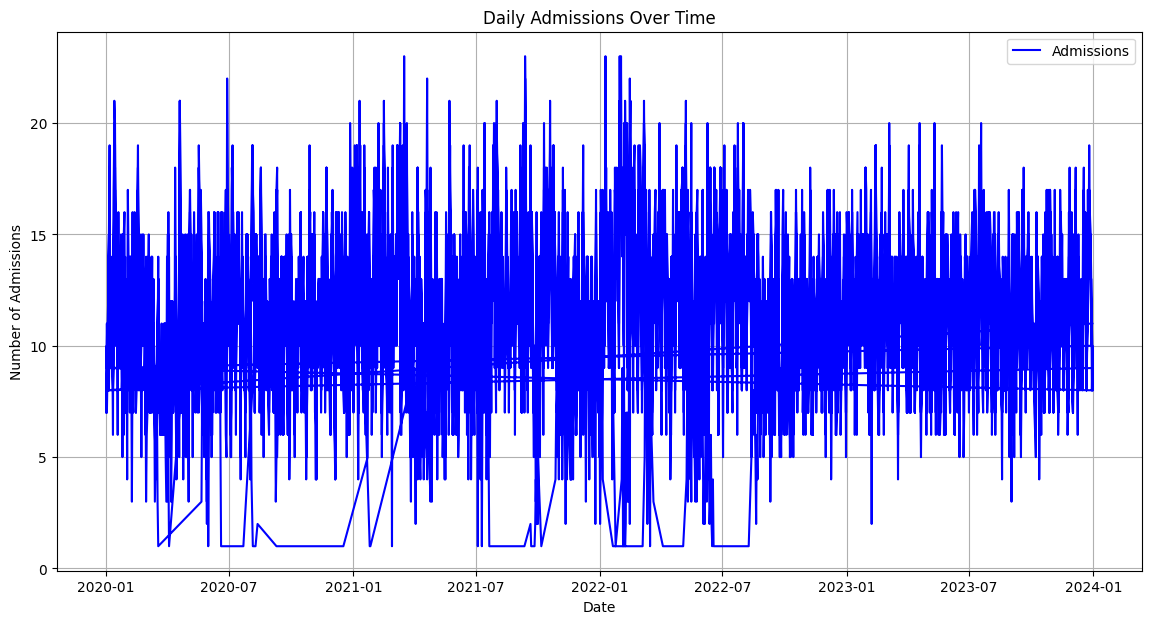

C:\Users\along\AppData\Local\Temp\ipykernel_25468\3253445059.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trends = units_admissions_df.resample('M', on='תאריך').sum()


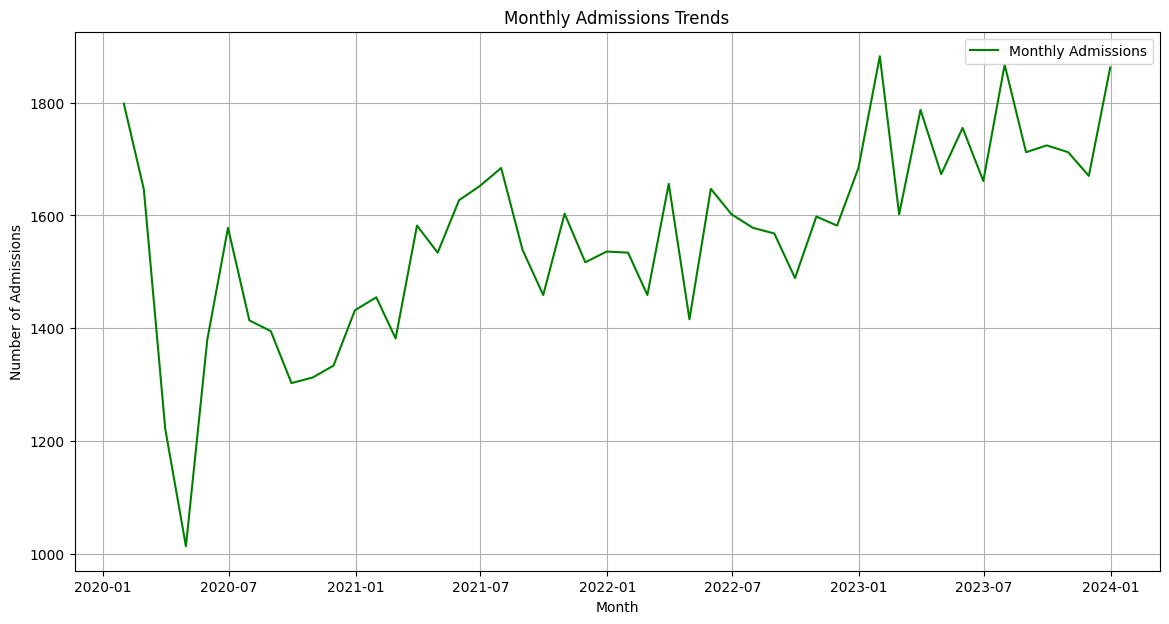

In [13]:
# Plotting the total admissions over time to identify trends and seasonality
plt.figure(figsize=(14, 7))
plt.plot(units_admissions_df['תאריך'], units_admissions_df['כמות קבלות'], label='Admissions', color='blue')
plt.title('Daily Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

# Aggregating data by month to analyze monthly trends
monthly_trends = units_admissions_df.resample('M', on='תאריך').sum()

# Plotting the monthly admissions trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_trends.index, monthly_trends['כמות קבלות'], label='Monthly Admissions', color='green')
plt.title('Monthly Admissions Trends')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend()
plt.show()

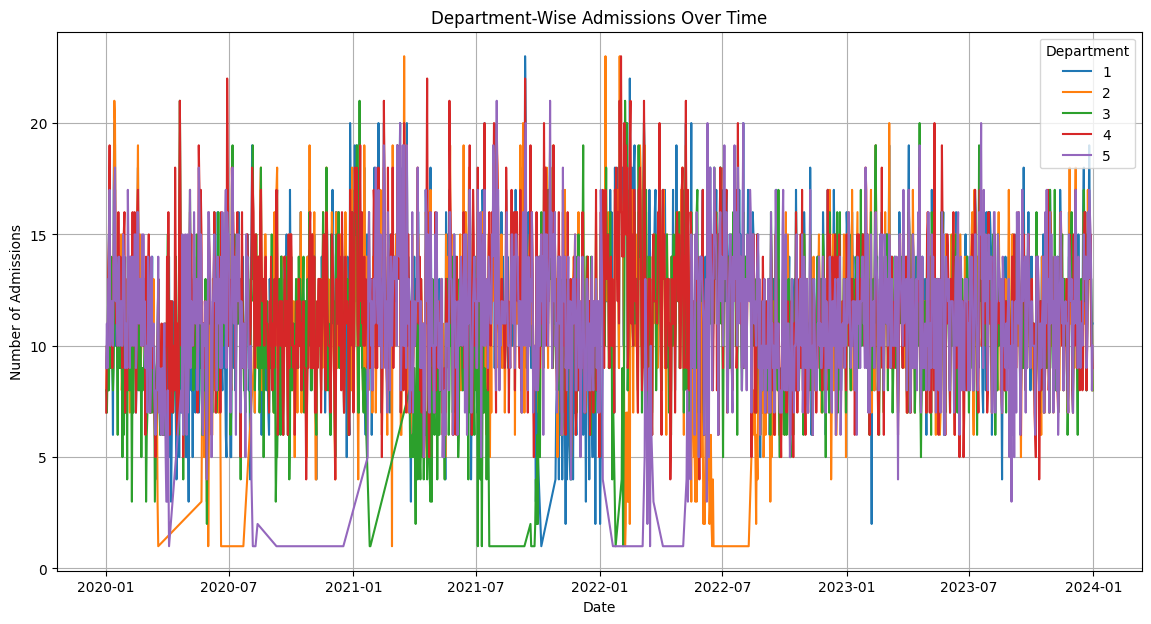

C:\Users\along\AppData\Local\Temp\ipykernel_25468\236504822.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='מחלקה', y='כמות קבלות', data=units_admissions_df, palette='tab10')


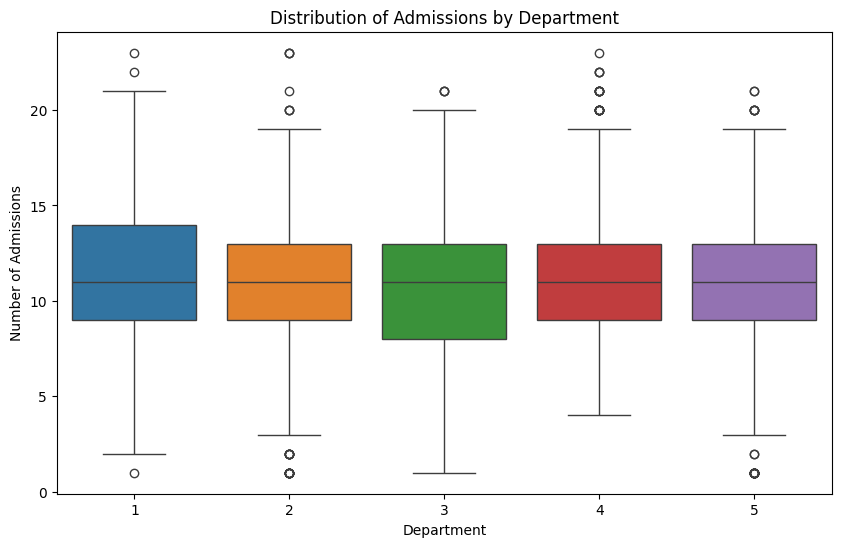

In [14]:
# Plotting department-wise admissions over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='תאריך', y='כמות קבלות', hue='מחלקה', data=units_admissions_df, palette='tab10')
plt.title('Department-Wise Admissions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.legend(title='Department', loc='upper right')
plt.show()

# Boxplot to compare admission distributions across departments
plt.figure(figsize=(10, 6))
sns.boxplot(x='מחלקה', y='כמות קבלות', data=units_admissions_df, palette='tab10')
plt.title('Distribution of Admissions by Department')
plt.xlabel('Department')
plt.ylabel('Number of Admissions')
plt.show()


In [15]:
# Load relevant sheets
hospitalization1_df = pd.read_excel(file_path, sheet_name='hospitalization1')
hospitalization2_df = pd.read_excel(file_path, sheet_name='hospitalization2')
h_doctor_df = pd.read_excel(file_path, sheet_name='hDoctor')

# Convert dates to datetime for comparison
hospitalization1_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization1_df['Admission_Entry_Date'])
hospitalization1_df['Release_Date'] = pd.to_datetime(hospitalization1_df['Release_Date'])
hospitalization2_df['Admission_Entry_Date'] = pd.to_datetime(hospitalization2_df['Admission_Entry_Date'])
hospitalization2_df['Release_Date'] = pd.to_datetime(hospitalization2_df['Release_Date'])

# Sort by Patient and Admission Date to facilitate rehospitalization identification
hospitalization1_df = hospitalization1_df.sort_values(by=['Patient', 'Admission_Entry_Date'])
hospitalization2_df = hospitalization2_df.sort_values(by=['Patient', 'Admission_Entry_Date'])

# Identify rehospitalizations: find cases where the same patient is admitted within 30 days of release
hospitalization1_df['Rehospitalized'] = hospitalization1_df.groupby('Patient')['Admission_Entry_Date'].diff().dt.days <= 30

# Merge with the doctor load data from `hDoctor` for the discharge doctor
doctor_load_df = h_doctor_df.rename(columns={"קוד רופא": "רופא משחרר-קוד"})
merged_df = pd.merge(hospitalization1_df, doctor_load_df, how='left', left_on='רופא משחרר-קוד', right_on='רופא משחרר-קוד')

# Analyzing the relationship between rehospitalization and doctor load
rehospitalization_analysis = merged_df[['Patient', 'Rehospitalized', 'רופא משחרר-קוד', 'כמות מטופלים']].dropna()

# Calculating the correlation between doctor load (number of patients) and rehospitalization
correlation = rehospitalization_analysis['Rehospitalized'].corr(rehospitalization_analysis['כמות מטופלים'])


In [18]:
correlation

-0.003385919108722247